In [11]:
import cv2,os

data_path='C:\\Users\\dassa\\Desktop\\Face Mask Dataset\\Train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'WithMask': 0, 'WithoutMask': 1}
['WithMask', 'WithoutMask']
[0, 1]


In [12]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image
      

In [13]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [14]:
np.save('data',data)
np.save('target',new_target)

In [15]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [16]:
#CNN Model Architecture
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()


model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 activation_4 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_5 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

In [17]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [19]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/10
225/225 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.9112

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


225/225 [==============================] - 219s 974ms/step - loss: 0.2272 - accuracy: 0.9112 - val_loss: 0.1021 - val_accuracy: 0.9606
Epoch 2/10
225/225 [==============================] - 230s 1s/step - loss: 0.1180 - accuracy: 0.9601 - val_loss: 0.1619 - val_accuracy: 0.9428
Epoch 3/10
225/225 [==============================] - 242s 1s/step - loss: 0.0964 - accuracy: 0.9672 - val_loss: 0.1380 - val_accuracy: 0.9484
Epoch 4/10
225/225 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9737

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


225/225 [==============================] - 239s 1s/step - loss: 0.0760 - accuracy: 0.9737 - val_loss: 0.0628 - val_accuracy: 0.9783
Epoch 5/10
225/225 [==============================] - 241s 1s/step - loss: 0.0572 - accuracy: 0.9794 - val_loss: 0.0635 - val_accuracy: 0.9800
Epoch 6/10
225/225 [==============================] - ETA: 0s - loss: 0.0537 - accuracy: 0.9794

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


225/225 [==============================] - 237s 1s/step - loss: 0.0537 - accuracy: 0.9794 - val_loss: 0.0542 - val_accuracy: 0.9795
Epoch 7/10
225/225 [==============================] - 228s 1s/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0650 - val_accuracy: 0.9783
Epoch 8/10
225/225 [==============================] - 233s 1s/step - loss: 0.0376 - accuracy: 0.9853 - val_loss: 0.1448 - val_accuracy: 0.9534
Epoch 9/10
225/225 [==============================] - 239s 1s/step - loss: 0.0460 - accuracy: 0.9835 - val_loss: 0.0562 - val_accuracy: 0.9822
Epoch 10/10
225/225 [==============================] - ETA: 0s - loss: 0.0296 - accuracy: 0.9881

INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


225/225 [==============================] - 233s 1s/step - loss: 0.0296 - accuracy: 0.9881 - val_loss: 0.0530 - val_accuracy: 0.9839


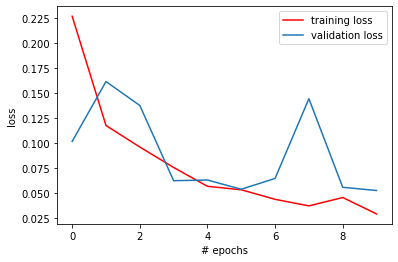

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

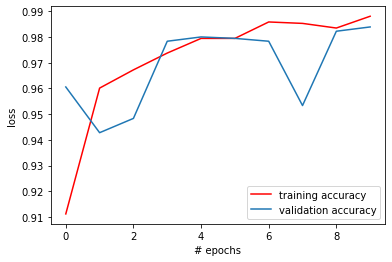

In [21]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
print(model.evaluate(test_data,test_target))

32/32 [==============================] - 7s 209ms/step - loss: 0.0579 - accuracy: 0.9780
[0.05791718140244484, 0.9780219793319702]


In [23]:

from keras.models import load_model
import os
import cv2
import numpy as np

In [24]:
model = load_model('model-017.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(1)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [26]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
